In [1]:
import pandas as pd
import numpy as np
import string
from collections import defaultdict
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
matplotlib.style.use('ggplot')

In [2]:
df = pd.read_csv('data/data.csv', encoding='latin-1')

In [3]:
print(len(df))

1491


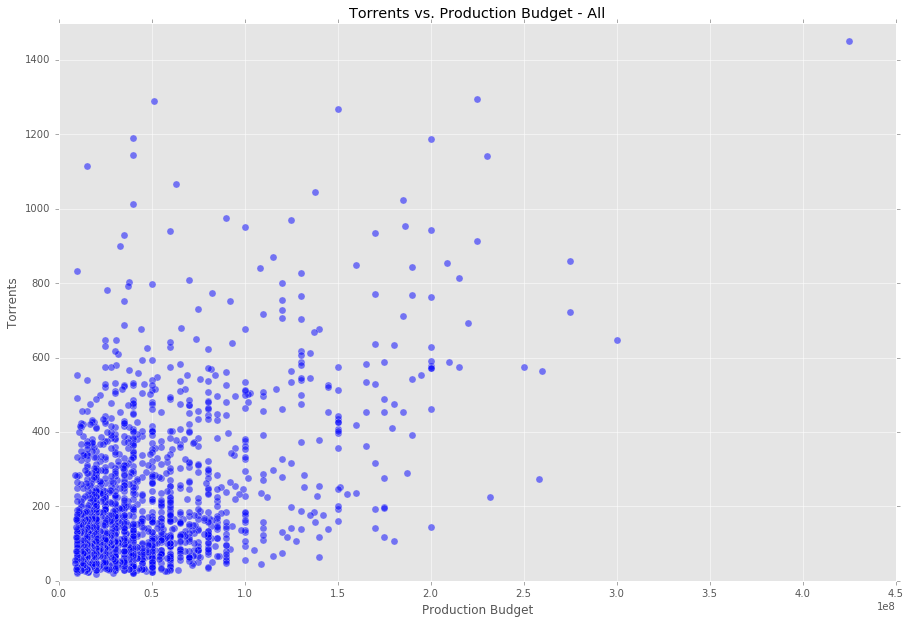

In [4]:
plt.figure(figsize=(15,10))
plt.axis([0, 450000000, 0, 1500])
plt.xlabel('Production Budget')
plt.ylabel('Torrents')
plt.title('Torrents vs. Production Budget - All')
plt.scatter(df['Prod_Budget'], df['Total_Torrents'], alpha=0.5, s=50)

In [9]:
# unique list of grouped actors
unq_actors = df['Actors'].unique()
unq_actors = unq_actors.tolist()

# unique list of individual actors
ind_actor = set()

for lst in unq_actors:
    for actor in lst.split(','):
        ind_actor.add(actor.strip())
ind_actor = sorted(ind_actor)

print(len(ind_actor))
#print(ind_actor)

2827


In [15]:
# dictionary - count of actor occurences
count = defaultdict(lambda:0)

for actor in ind_actor:
    count[actor] = df.Actors.str.contains(actor).sum()

import operator
srt = sorted(count.items(), key=operator.itemgetter(1))
srt = srt[::-1]
#print(srt)
#print(count)

srt_ten = [(actor, ct) for actor, ct in srt if ct > 9]
print(srt_ten)
print(len(srt_ten))

[('Robert De Niro', 27), ('Bruce Willis', 24), ('Denzel Washington', 21), ('Julia Roberts', 21), ('Samuel L. Jackson', 20), ('Eddie Murphy', 20), ('Harrison Ford', 19), ('Cameron Diaz', 19), ('Mark Wahlberg', 18), ('Adam Sandler', 18), ('Leon', 18), ('George Clooney', 18), ('Arnold Schwarzenegger', 16), ('Ben Stiller', 15), ('Johnny Depp', 15), ('Tom Cruise', 15), ('Sandra Bullock', 14), ('Owen Wilson', 14), ('Morgan Freeman', 14), ('Matt Damon', 14), ('Nicolas Cage', 14), ('Sylvester Stallone', 14), ('Tom Hanks', 14), ('Jason Statham', 13), ('Kevin Costner', 13), ('Jack Black', 13), ('Robert Downey Jr.', 13), ('Russell Crowe', 13), ('Channing Tatum', 12), ('Tommy Lee Jones', 12), ('Sean Connery', 12), ('Brad Pitt', 12), ('Gerard Butler', 12), ('Gary Oldman', 12), ('Keanu Reeves', 12), ('Will Smith', 12), ('Dave', 12), ('Will Ferrell', 12), ('John Travolta', 12), ('Jennifer Lopez', 12), ('Nicole Kidman', 12), ('Anthony Hopkins', 12), ('Jamie Foxx', 12), ('Robin Williams', 11), ('Ben Af

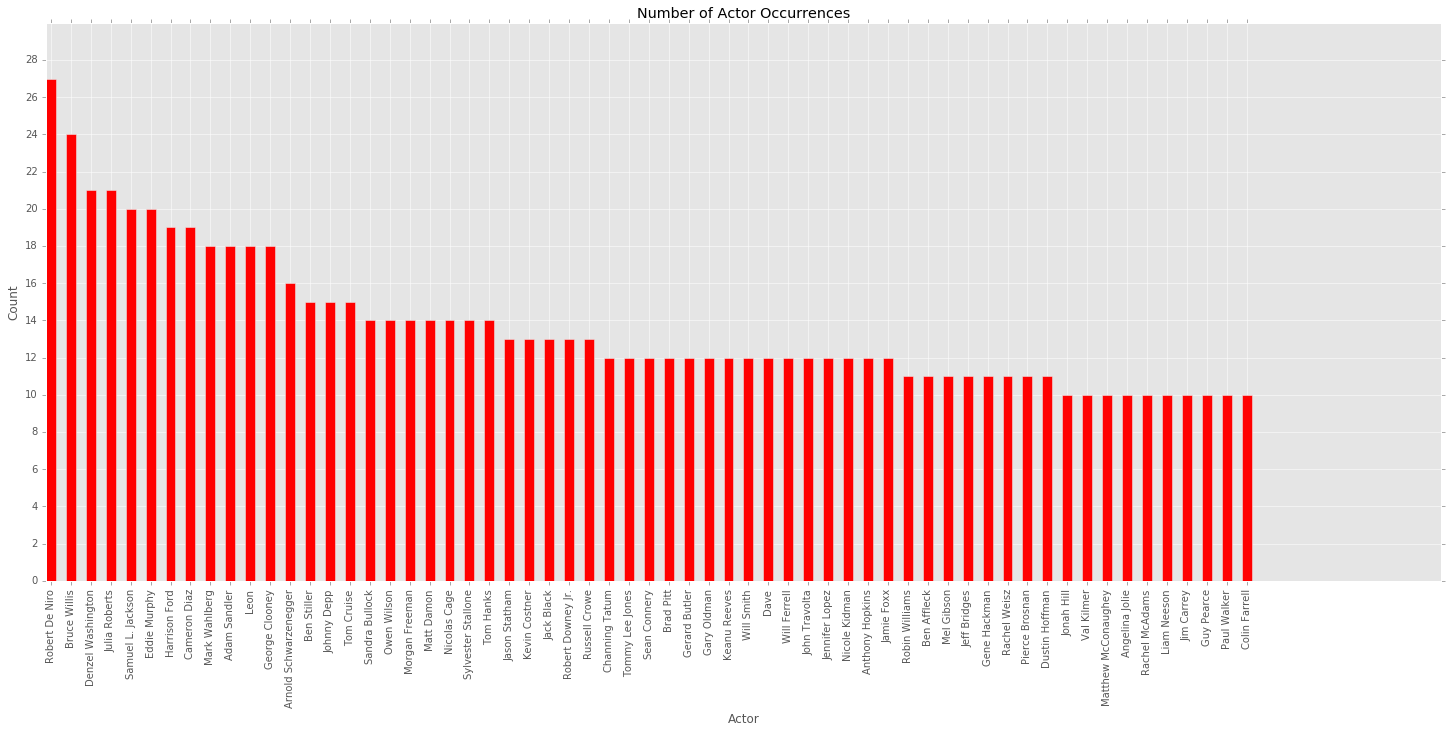

In [64]:
plt.figure(figsize=(25,10))

ind = np.arange(len(srt_ten)) # the x locations for the groups
width = 0.5 # the width of the bars

bar_actor = [actor for actor, count in srt_ten]
bar_count = [count for actor, count in srt_ten]

plt.bar(ind, bar_count, width, color='r')

plt.ylabel('Count')
plt.xlabel('Actor')
plt.title('Number of Actor Occurrences')
plt.xticks(ind + width/2.0, (bar_actor), rotation='vertical')
plt.yticks(np.arange(0, 29, 2))
plt.show()

In [38]:
# return tuple of (string, list)
tup_lst = []
for actor_gp in unq_actors:
    temp = []
    for actor in actor_gp.split():
        temp.append(actor)
    tup_lst.append((actor_gp, temp))

In [39]:
def srch_lst(term, t_lst):
    srch = []
    for st, lst in t_lst:
        if term in st:
            srch.append(st)
    return srch
# print(srch_lst('Robert De Niro', tup_lst))

['Robert De Niro, Ben Stiller, Owen Wilson, Dustin Hoffman', 'Robert De Niro, Rachael Harris, Eddie Murphy, Zaid Farid', 'Jason Statham, Clive Owen, Robert De Niro, Dominic Purcell', 'Robert De Niro, Edward Norton, Marlon Brando, Angela Bassett', 'Robert De Niro, Ben Stiller, Dustin Hoffman, Barbra Streisand', 'Jennifer Lawrence, Robert De Niro, Bradley Cooper, Edgar RamÃ\xadrez', 'Robert De Niro, Ben Stiller, Teri Polo, Blythe Danner', 'Robert De Niro, Wesley Snipes, Ellen Barkin, John Leguizamo', 'Robert De Niro, Jean Reno, Natascha McElhone, Stellan SkarsgÃ¥rd', 'Robert De Niro, Sharon Stone, Joe Pesci, James Woods', 'Robert De Niro, Edward Burns, Kelsey Grammer, Avery Brooks', 'Robert De Niro, Frances McDormand, James Franco, Eliza Dushku', 'Jim Lampley, Sylvester Stallone, Robert De Niro, Rich Little', 'Robert De Niro, Anne Hathaway, Rene Russo, Anders Holm', 'Robert De Niro, Nick Nolte, Jessica Lange, Juliette Lewis', 'Robert De Niro, Katherine Heigl, Diane Keaton, Amanda Seyfrie

27


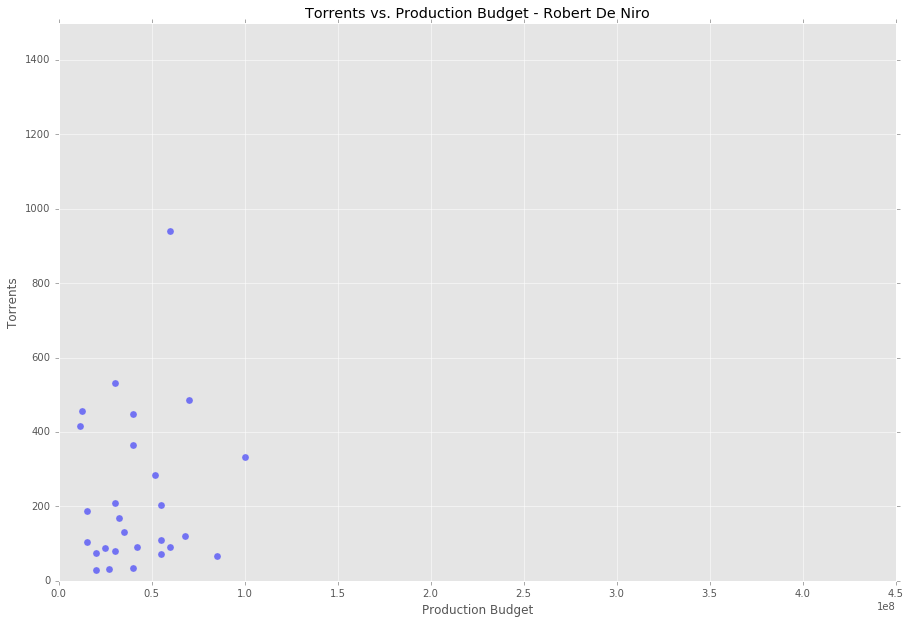

In [62]:
term = 'Robert De Niro'
df_a = df.loc[df['Actors'].isin(srch_lst(term, tup_lst))]
print(len(df_a))

plt.figure(figsize=(15,10))
plt.axis([0, 450000000, 0, 1500])
plt.xlabel('Production Budget')
plt.ylabel('Torrents')
plt.title('Torrents vs. Production Budget - {0}'.format(term))
plt.scatter(df_a['Prod_Budget'], df_a['Total_Torrents'], alpha=0.5, s=50)

24


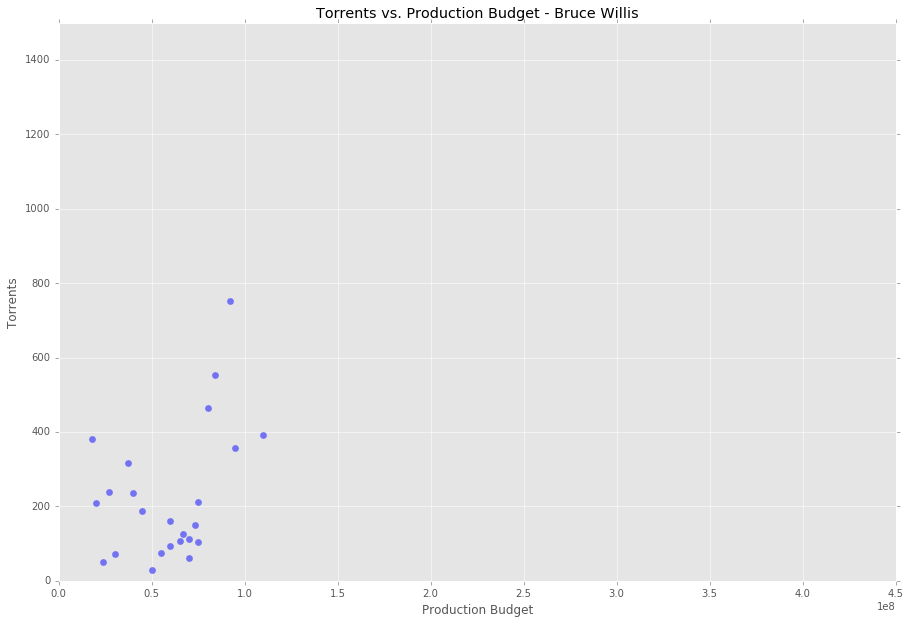

In [43]:
term = 'Bruce Willis'
df_a = df.loc[df['Actors'].isin(srch_lst(term, tup_lst))]
print(len(df_a))

plt.figure(figsize=(15,10))
plt.axis([0, 450000000, 0, 1500])
plt.xlabel('Production Budget')
plt.ylabel('Torrents')
plt.title('Torrents vs. Production Budget - {0}'.format(term))
plt.scatter(df_a['Prod_Budget'], df_a['Total_Torrents'], alpha=0.5, s=50)

21


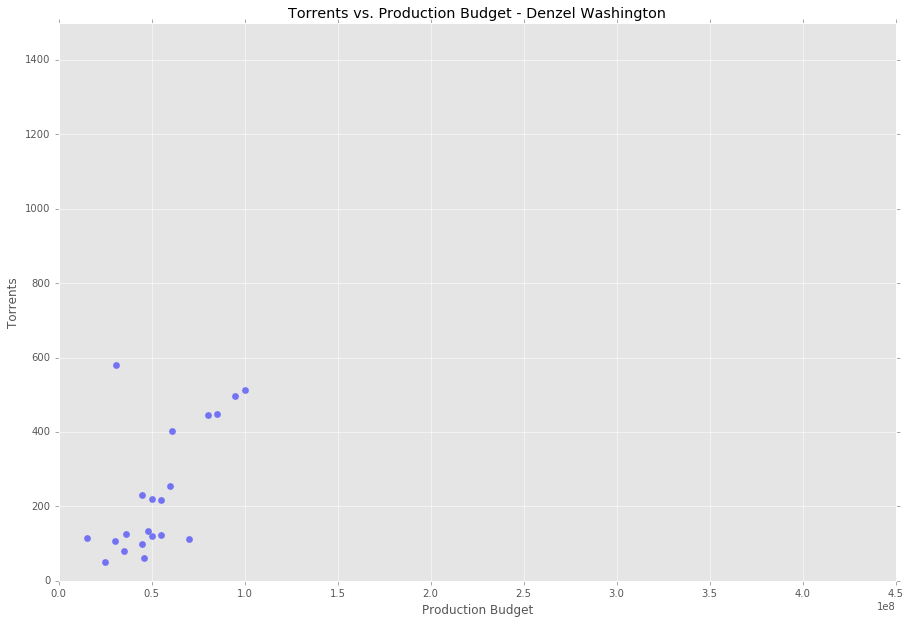

In [49]:
term = 'Denzel Washington'
df_a = df.loc[df['Actors'].isin(srch_lst(term, tup_lst))]
print(len(df_a))

plt.figure(figsize=(15,10))
plt.axis([0, 450000000, 0, 1500])
plt.xlabel('Production Budget')
plt.ylabel('Torrents')
plt.title('Torrents vs. Production Budget - {0}'.format(term))
plt.scatter(df_a['Prod_Budget'], df_a['Total_Torrents'], alpha=0.5, s=50)

21


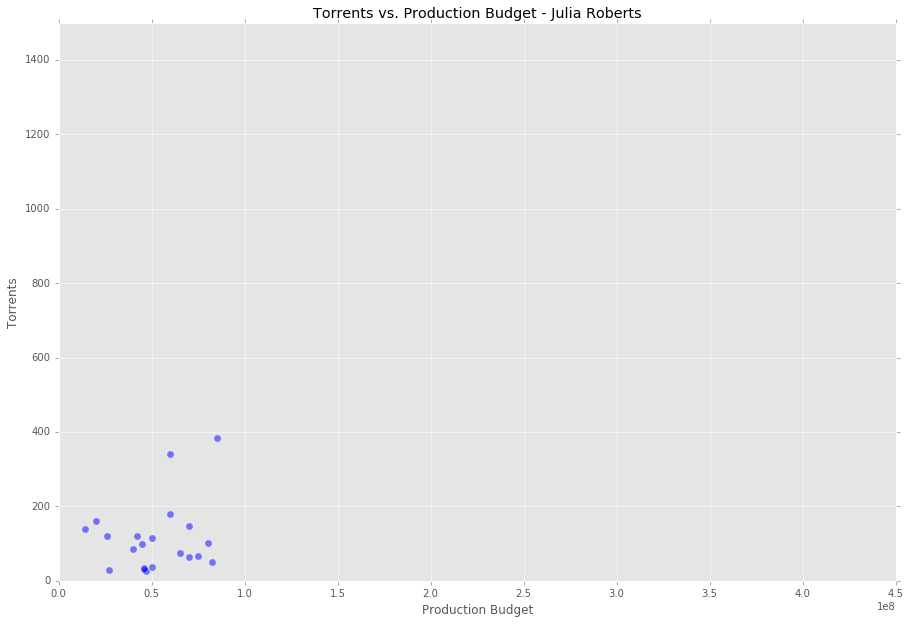

In [50]:
term = 'Julia Roberts'
df_a = df.loc[df['Actors'].isin(srch_lst(term, tup_lst))]
print(len(df_a))

plt.figure(figsize=(15,10))
plt.axis([0, 450000000, 0, 1500])
plt.xlabel('Production Budget')
plt.ylabel('Torrents')
plt.title('Torrents vs. Production Budget - {0}'.format(term))
plt.scatter(df_a['Prod_Budget'], df_a['Total_Torrents'], alpha=0.5, s=50)

20


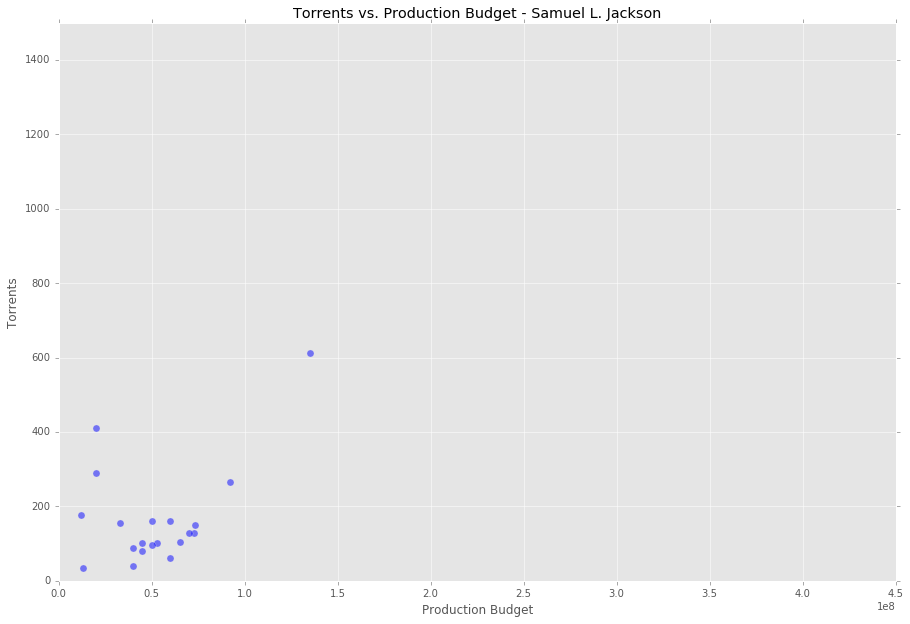

In [52]:
term = 'Samuel L. Jackson'
df_a = df.loc[df['Actors'].isin(srch_lst(term, tup_lst))]
print(len(df_a))

plt.figure(figsize=(15,10))
plt.axis([0, 450000000, 0, 1500])
plt.xlabel('Production Budget')
plt.ylabel('Torrents')
plt.title('Torrents vs. Production Budget - {0}'.format(term))
plt.scatter(df_a['Prod_Budget'], df_a['Total_Torrents'], alpha=0.5, s=50)

13


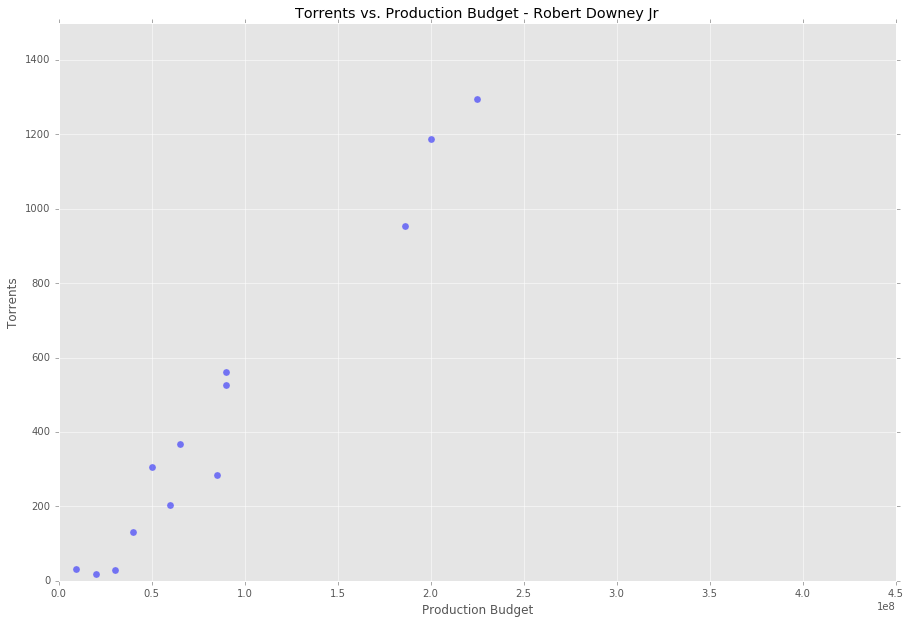

In [63]:
term = 'Robert Downey Jr'
df_a = df.loc[df['Actors'].isin(srch_lst(term, tup_lst))]
print(len(df_a))

plt.figure(figsize=(15,10))
plt.axis([0, 450000000, 0, 1500])
plt.xlabel('Production Budget')
plt.ylabel('Torrents')
plt.title('Torrents vs. Production Budget - {0}'.format(term))
plt.scatter(df_a['Prod_Budget'], df_a['Total_Torrents'], alpha=0.5, s=50)

In [47]:
df['Actors'].value_counts()

Mel Gibson, Danny Glover, Joe Pesci, Rene Russo                                 2
Adam Sandler, Kevin James, Chris Rock, David Spade                              2
Tobin Bell, Costas Mandylor, Scott Patterson, Betsy Russell                     2
Brendan Fraser, Rachel Weisz, John Hannah, Arnold Vosloo                        2
Michael J. Fox, Geena Davis, Hugh Laurie, Jonathan Lipnicki                     2
Johnny Depp, Mia Wasikowska, Helena Bonham Carter, Anne Hathaway                2
Cuba Gooding Jr., Ed Harris, Alfre Woodard, S. Epatha Merkerson                 1
Dwayne Johnson, Xzibit, L. Scott Caldwell, Leon Rippy                           1
Ben Stiller, Drew Barrymore, Eileen Essell, Harvey Fierstein                    1
Ben Stiller, Chris Rock, David Schwimmer, Jada Pinkett Smith                    1
Chauncey Leopardi, Spencer Vrooman, Malachi Pearson, Cathy Moriarty             1
Kevin Costner, Robin Wright, Paul Newman, John Savage                           1
Gabriel Byrne, J